### Introduction to Logistic Regression 

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

### Sigmoid
$$p(i) = \frac{1}{1+e^{-(b_0+b_1*x)}}$$

[-2, 10, -0.5, 2]

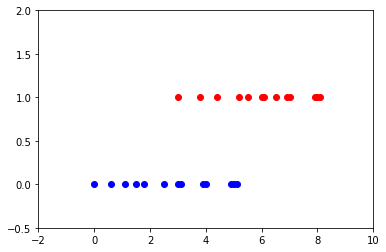

In [25]:
x1 = np.array([0,0.6,1.1,1.5,1.8,2.5,3,3.1,3.9,4,4.9,5,5.1])
y1 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
x2 = np.array([3,3.8,4.4,5.2,5.5,6.5,6,6.1,6.9,7,7.9,8,8.1])
y2 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])

X = np.array([[0],[0.6],[1.1],[1.5],[1.8],[2.5],[3],[3.1],[3.9],[4],[4.9],[5],[5.1],[3],[3.8],[4.4],[5.2],[5.5],[6.5],[6],[6.1],[6.9],[7],[7.9],[8],[8.1]])
y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1])

plt.plot(x1,y1,'ro',color='blue')
plt.plot(x2,y2,'ro',color='red')
plt.axis([-2,10,-0.5,2])

In [21]:
classifier = LogisticRegression()
classifier.fit(X,y)
pred  = classifier.predict_proba(8)
print(pred)

[[ 0.12407126  0.87592874]]


[-2, 10, -0.5, 2]

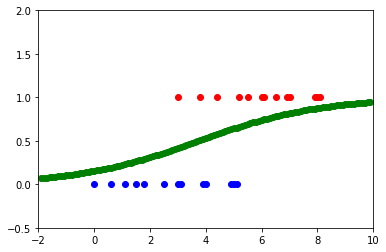

In [30]:
def model(classifier,x):
    return 1/(1+np.exp(-(classifier.intercept_ + classifier.coef_*x)))

for i in range(1,120,1):
    plt.plot(i/10.0-2,model(classifier,i/10.0-2),'ro',color='green')
plt.plot(x1,y1,'ro',color='blue')
plt.plot(x2,y2,'ro',color='red')
plt.axis([-2,10,-0.5,2])

### Example 2: Can pay debt or not:
<table>
    <tr>
        <td>
        balance
        </td>
        <td>
        income
        </td>
        <td>
        age
        </td>
        <td>
        can_pay_debt
        </td>
    </tr>
    <tr>
        <td>
        10,000
        </td>
        <td>
        80,000
        </td>
        <td>
        35
        </td>
        <td>
        1
        </td>
    </tr>
    <tr>
        <td>
        7,000
        </td>
        <td>
        120,000
        </td>
        <td>
        57
        </td>
        <td>
        1
        </td>
    </tr>
    <tr>
        <td>
        100
        </td>
        <td>
        23,000
        </td>
        <td>
        22
        </td>
        <td>
        0
        </td>
    </tr>
    <tr>
        <td>
        223
        </td>
        <td>
        18,000
        </td>
        <td>
        26
        </td>
        <td>
        0
        </td>
    </tr>
</table>

In [37]:
X = np.array([[10000,80000,35],[7000,120000,57],[100,23000,22],[223,18000,26]])
Y = np.array([1,1,0,0])
classifier = LogisticRegression()
classifier.fit(X,Y)
print(classifier.predict([[5500,50000,25]]) )

[1]


### Expriment on a 2000 rows dataset 

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
creditData = pd.read_csv('data.csv')
print(creditData.head())

   clientid        income        age         loan       LTI  default10yr
0         1  66155.925095  59.017015  8106.532131  0.122537            0
1         2  34415.153966  48.117153  6564.745018  0.190752            0
2         3  57317.170063  63.108049  8020.953296  0.139940            0
3         4  42709.534201  45.751972  6103.642260  0.142911            0
4         5  66952.688845  18.584336  8770.099235  0.130989            1


In [48]:
print(creditData.describe())

          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1939.708847     0.047903   
50%    1000.500000  45789.117313    41.382673   3974.719419     0.099437   
75%    1500.250000  57791.281668    52.596993   6432.410625     0.147585   
max    2000.000000  69995.685578    63.971796  13766.051239     0.199938   

       default10yr  
count  2000.000000  
mean      0.141500  
std       0.348624  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


In [51]:
print(creditData.corr())

             clientid    income       age      loan       LTI  default10yr
clientid     1.000000  0.039280 -0.030341  0.018931  0.002538    -0.020145
income       0.039280  1.000000 -0.034984  0.441117 -0.019862     0.002284
age         -0.030341 -0.034984  1.000000  0.006561  0.021588    -0.444765
loan         0.018931  0.441117  0.006561  1.000000  0.847495     0.377160
LTI          0.002538 -0.019862  0.021588  0.847495  1.000000     0.433261
default10yr -0.020145  0.002284 -0.444765  0.377160  0.433261     1.000000


In [55]:
features = creditData[["income","age","loan"]]
targetVariable = creditData.default10yr

### Training, Test subsets

In [58]:
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features,targetVariable,test_size=0.2)

### Model 

In [65]:
model = LogisticRegression()
fittedModel = model.fit(featureTrain,targetTrain)
#testing
predictions = fittedModel.predict(featureTest)

### Print confusion matrix for the target 

In [68]:
print(confusion_matrix(targetTest,predictions))

[[330  13]
 [ 33  24]]


### Print accuracy 

In [67]:
print(accuracy_score(targetTest,predictions))

0.885
